In [1]:
import pandapower as pp
import pandapower.networks as pn
from pandapower.plotting import simple_plot

import numpy as np

In [2]:
net_test = pn.case6ww()

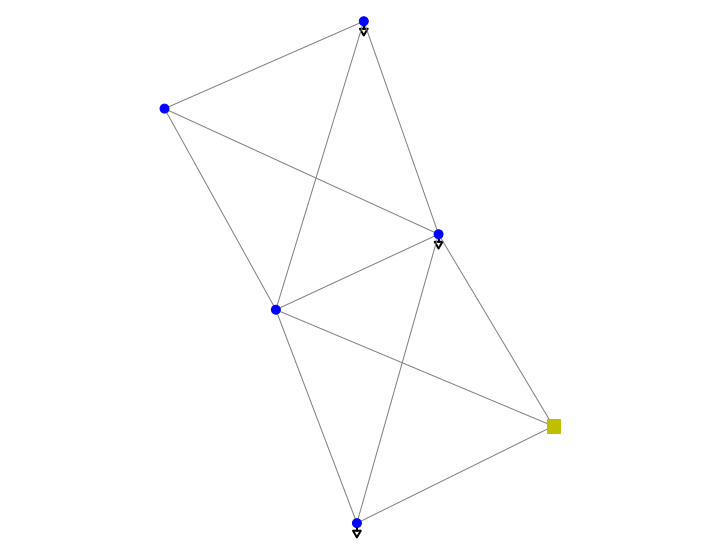

<AxesSubplot:>

In [3]:
simple_plot(net_test, plot_loads=True, plot_sgens=True)

In [5]:
net_test.load

,bus,const_i_percent,const_z_percent,controllable,in_service,name,p_mw,q_mvar,scaling,sn_mva,type
0,3,0.0,0.0,False,True,None,70.0,70.0,1.0,NaN,None
1,4,0.0,0.0,False,True,None,70.0,70.0,1.0,NaN,None
2,5,0.0,0.0,False,True,None,70.0,70.0,1.0,NaN,None


In [9]:
pp.runpp(net_test)

In [10]:
pp.runopp(net_test, verbose=True, suppress_warnings=False)

PYPOWER Version 5.1.4, 27-June-2018 -- AC Optimal Power Flow
Python Interior Point Solver - PIPS, Version 1.0, 07-Feb-2011
Converged!

Converged in 0.63 seconds
| PyPower (ppci) System Summary - these are not valid for pandapower DataFrames|

How many?                How much?              P (MW)            Q (MVAr)
---------------------    -------------------  -------------  -----------------
Buses              6     Total Gen Capacity     530.0        -300.0 to 300.0
Generators         3     On-line Capacity       530.0        -300.0 to 300.0
Committed Gens     3     Generation (actual)    216.8             176.5
Loads              3     Load                   210.0             210.0
  Fixed            3       Fixed                210.0             210.0
  Dispatchable     0       Dispatchable           0.0 of 0.0        0.0
Shunts             0     Shunt (inj)              0.0               0.0
Branches          11     Losses (I^2 * Z)         6.75             20.64
Transformers    

/home/ivanightingale/anaconda3/envs/power/lib/python3.9/site-packages/pandapower/pypower/pipsopf_solver.py:167: ComplexWarning: Casting complex values to real discards the imaginary part
  Sf = V[ branch[:, F_BUS].astype(int) ] * conj(Yf * V)  ## cplx pwr at "from" bus, p["u"].
/home/ivanightingale/anaconda3/envs/power/lib/python3.9/site-packages/pandapower/pypower/pipsopf_solver.py:168: ComplexWarning: Casting complex values to real discards the imaginary part
  St = V[ branch[:, T_BUS].astype(int) ] * conj(Yt * V)  ## cplx pwr at "to" bus, p["u"].
/home/ivanightingale/anaconda3/envs/power/lib/python3.9/site-packages/pandapower/pypower/pipsopf_solver.py:179: ComplexWarning: Casting complex values to real discards the imaginary part
  muSf[il] = \
/home/ivanightingale/anaconda3/envs/power/lib/python3.9/site-packages/pandapower/pypower/pipsopf_solver.py:181: ComplexWarning: Casting complex values to real discards the imaginary part
  muSt[il] = \


In [11]:
net_test.res_cost

3134.3495346964937

### Verification

In [17]:
net_test

This pandapower network includes the following parameter tables:
   - bus (6 elements)
   - load (3 elements)
   - gen (2 elements)
   - ext_grid (1 element)
   - line (11 elements)
   - poly_cost (3 elements)
   - bus_geodata (6 elements)
 and the following results tables:
   - res_bus (6 elements)
   - res_line (11 elements)
   - res_ext_grid (1 element)
   - res_load (3 elements)
   - res_gen (2 elements)

In [12]:
V_polar = net_test.res_bus[["vm_pu", "va_degree"]].to_numpy()
V_polar

array([[ 1.05      ,  0.        ],
       [ 1.05      , -1.38422888],
       [ 1.07      , -1.54415779],
       [ 0.98772713, -2.66918202],
       [ 0.984875  , -3.44849693],
       [ 1.00465131, -3.4871607 ]])

In [13]:
V = V_polar[:,0] * np.exp(1j * (V_polar[:,1] / 180 * np.pi))
V

array([1.05      +0.j        , 1.04969359-0.02536485j,
       1.06961143-0.02883369j, 0.98665552-0.04599763j,
       0.98309166-0.05924151j, 1.00279115-0.06110778j])

In [14]:
X = V.reshape(-1,1) @ V.conjugate().reshape(1,-1)
X

array([[1.1025    +0.j        , 1.10217827+0.02663309j,
        1.123092  +0.03027538j, 1.03598829+0.04829751j,
        1.03224624+0.06220358j, 1.05293071+0.06416317j],
       [1.10217827-0.02663309j, 1.1025    +0.j        ,
        1.12349562+0.00313601j, 1.03685269+0.02325704j,
        1.03344766+0.03724945j, 1.05417343+0.0387088j ],
       [1.123092  -0.03027538j, 1.12349562-0.00313601j,
        1.1449    +0.j        , 1.0566643 +0.02075067j,
        1.05323423+0.03501923j, 1.07435885+0.03644741j],
       [1.03598829-0.04829751j, 1.03685269-0.02325704j,
        1.0566643 -0.02075067j, 0.97560489+0.j        ,
        0.97269778+0.01323107j, 0.99222024+0.01416632j],
       [1.03224624-0.06220358j, 1.03344766-0.03724945j,
        1.05323423-0.03501923j, 0.97269778-0.01323107j,
        0.96997877+0.j        , 0.98945574+0.00066769j],
       [1.05293071-0.06416317j, 1.05417343-0.0387088j ,
        1.07435885-0.03644741j, 0.99222024-0.01416632j,
        0.98945574-0.00066769j, 1.00932426+

In [36]:
np.concatenate((net_test.res_gen[["p_mw", "q_mvar"]].to_numpy(), net_test.res_sgen[["p_mw", "q_mvar"]].to_numpy(), net_test.res_ext_grid[["p_mw", "q_mvar"]].to_numpy()))

array([[76.72328296, 61.25990873],
       [73.56969147, 85.79073847],
       [66.45887933, 29.40322149]])